# Visualizing PCA

## PCA - 2D to 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
x1 = np.array([1,2,3,4,5,6])
x2 = np.array([7.5, 11, 16, 18, 20, 26])

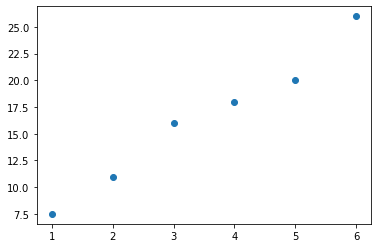

In [3]:
plt.scatter(x1, x2)
plt.show()

In [5]:
X = np.c_[x1, x2]
X

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [6]:
pca = PCA()
X_reduced = pca.fit_transform(X)

In [7]:
X_reduced

array([[-9.26049952e+00,  9.65263430e-03],
       [-5.62047228e+00,  2.38560598e-02],
       [-5.36562171e-01, -3.68391297e-01],
       [ 1.65958219e+00,  5.22629108e-02],
       [ 3.85572654e+00,  4.72917119e-01],
       [ 9.90222524e+00, -1.90297426e-01]])

When we are not putting any parameter in PCA then it will return same number of dimension as in original data. But the values are different. See that one value is higher[0] and other is negligible [1]

In [17]:
pca.components_

array([[0.27096719, 0.96258858]])

It gives the direction of axis of new data(X_reduced)

In [8]:
pca.inverse_transform(X_reduced)

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

.inverse_transform will try to reverse as exact previous value. When number of  dimension are exactly equal as original data then exactly same data will be come back. But if it is different then there will be little different.

In [13]:
pca = PCA(n_components = 1)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [14]:
X_approx = pca.inverse_transform(X_reduced)
X_approx

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

Minor difference from original data. Because new data has dimension 1 and new data has 1 dimension

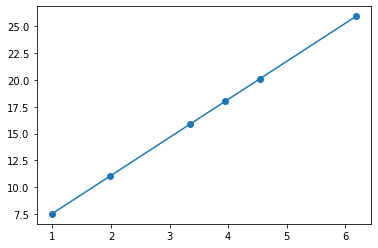

In [16]:
plt.plot(X_approx[:, 0], X_approx[:, 1])
plt.scatter(X_approx[:, 0], X_approx[:, 1])
plt.show()

When we reverse the data to original and number of dimension are less then actual data. Then there will definitely be some loss in data. 

When we converted 2D array to 1D array then one axis is not used eventually. And that data is saved. When we are doing inverse of it the data is not changing again. Same data is representing in original X axis and Y axis.

## PCA - 3D to 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(2343243)

In [3]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [4]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

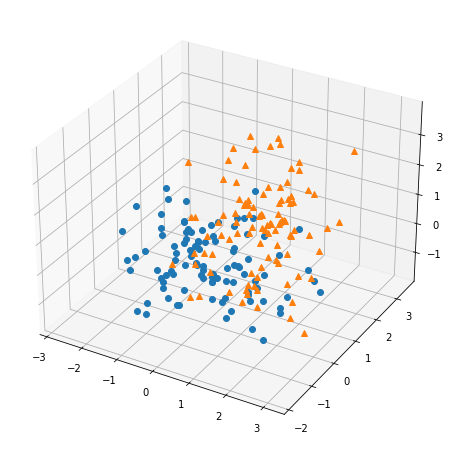

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [6]:
all_data = np.concatenate((class1, class2))

In [7]:
all_data.shape

(200, 3)

In [8]:
pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [9]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

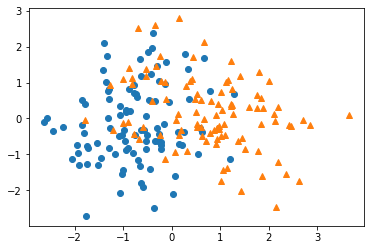

In [10]:
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show()

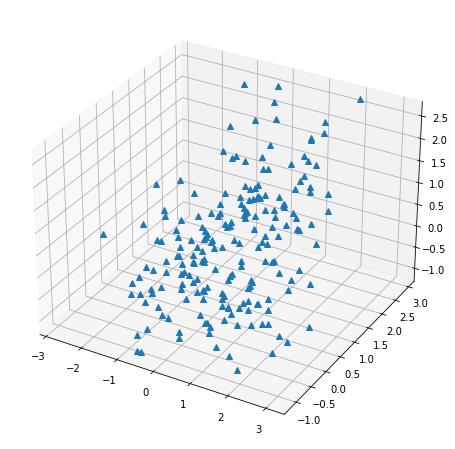

In [11]:
X_approx = pca.inverse_transform(transformed_data)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()

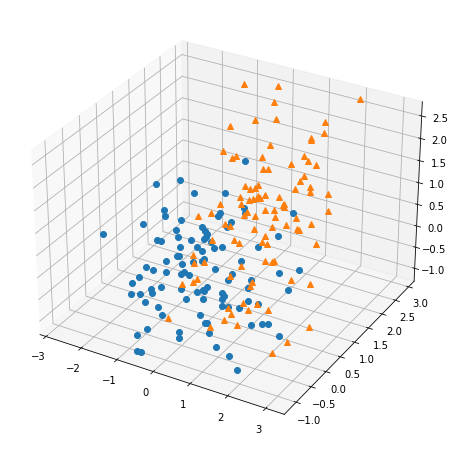

In [12]:
X_approx = pca.inverse_transform(transformed_data)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[0:99, 0], X_approx[0:99, 1], X_approx[0:99, 2], 'o')
ax.plot(X_approx[100:199, 0], X_approx[100:199, 1], X_approx[100:199, 2], '^')
plt.show()

In [13]:
a = -0.409689
b = 7.2827
c = - 7.1008
i = 10
a * X_approx[i][0] + b* X_approx[i][1] + c * X_approx[i][2]

1.000035886448961

This is the 2D plane where every value of i will satisfy. Because after conversion it actully be in 2D plane somewhere

## Implementing our own PCA

In [14]:
# Fining Covariance
cov = np.cov(all_data)
cov.shape

(200, 200)

In [15]:
# We have to transpose first to get correct answer
all_data_t = all_data.T
cov = np.cov(all_data_t)
cov.shape

(3, 3)

In [16]:
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [21]:
eig_val, eig_vectors = np.linalg.eig(cov)
eig_val, eig_vectors

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [20]:
eig_val_vector_pair = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:,i]    #getting column wise values
    eig_val_vector_pair.append((eig_val[i],eig_vec))
    
eig_val_vector_pair.sort(reverse=True)   #Decreasing Order
eig_val_vector_pair

[(1.451865341735929, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978592, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554]))]

We can verify this by using inbuilt pca. Which we have done above already.

In [22]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

We can see that two arrays are exactly same 

In [23]:
pca.explained_variance_

array([1.45186534, 1.07866114])

We can see that two eigen values are also exactly same 